In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# plotting modules
import seaborn as sns
import missingno 

import matplotlib.pyplot as plt
df = pd.read_csv("../data/data-visualization/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
df.head()


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


Getting to know our data by looking for the datatype, the columns, the shape and descriptions of the data 

In [3]:
# Explore data
df.shape

(301, 8)

In [4]:
df.columns


Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [228]:
df.describe

<bound method NDFrame.describe of      S.NO               Name Nationality  Current Rank Previous Year Rank  \
0       1         Mike Tyson         USA             1                NaN   
1       2     Buster Douglas         USA             2                NaN   
2       3  Sugar Ray Leonard         USA             3                NaN   
3       4       Ayrton Senna      Brazil             4                NaN   
4       5        Alain Prost      France             5                NaN   
..    ...                ...         ...           ...                ...   
296   297      Stephen Curry         USA             6                  9   
297   298       Kevin Durant         USA             7                 10   
298   299        Tiger Woods         USA             8                 11   
299   300       Kirk Cousins         USA             9               >100   
300   301       Carson Wentz         USA            10               >100   

                 Sport  Year  earnings ($

cleaning our data, it is very important to work with clean data as this ensures that our analysis are accurate and unbiased

In [229]:
# sum of null values in every columns.
df.isnull().sum()


S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [230]:
# Convert to lower case
df['Sport'] = df['Sport'].str.lower()

# Remove trailing white spaces
df['Sport'] = df['Sport'].str.strip()

# Let us view the data
sports = df['Sport'].unique()
print(f"There are {len(sports)} unique sports")
sports

There are 20 unique sports


array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [250]:
df.replace('f1 motorsports', 'f1 racing', inplace=True)

# Get all the unique values in the 'country' column
sports = df['Sport'].unique()

print(f"There are {len(sports)} unique sports")
sports


There are 19 unique sports


array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 racing', 'nascar', 'hockey', 'auto racing (nascar)',
       'american football', 'soccer', 'cycling', 'motorcycle gp', 'mma'],
      dtype=object)

In [232]:
# no of duplicated rows in data frames
df.duplicated().value_counts()

False    301
Name: count, dtype: int64

In [233]:
# Drop duplicates if any
df = df.drop_duplicates()

In [234]:
# Display data types of each column
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [249]:
# Handling missing values and converting columns to appropriate data types
df['Previous Year Rank'] = pd.to_numeric(df['Previous Year Rank'].replace('>', ''), errors='coerce')
df['Previous Year Rank'].fillna(df['Previous Year Rank'].median(), inplace=True)
df.dtypes


S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank      float64
Sport                    object
Year                      int64
earnings ($ million)    float64
Decade                    int64
dtype: object

Which top 10 sports were paid the most over the decades? 

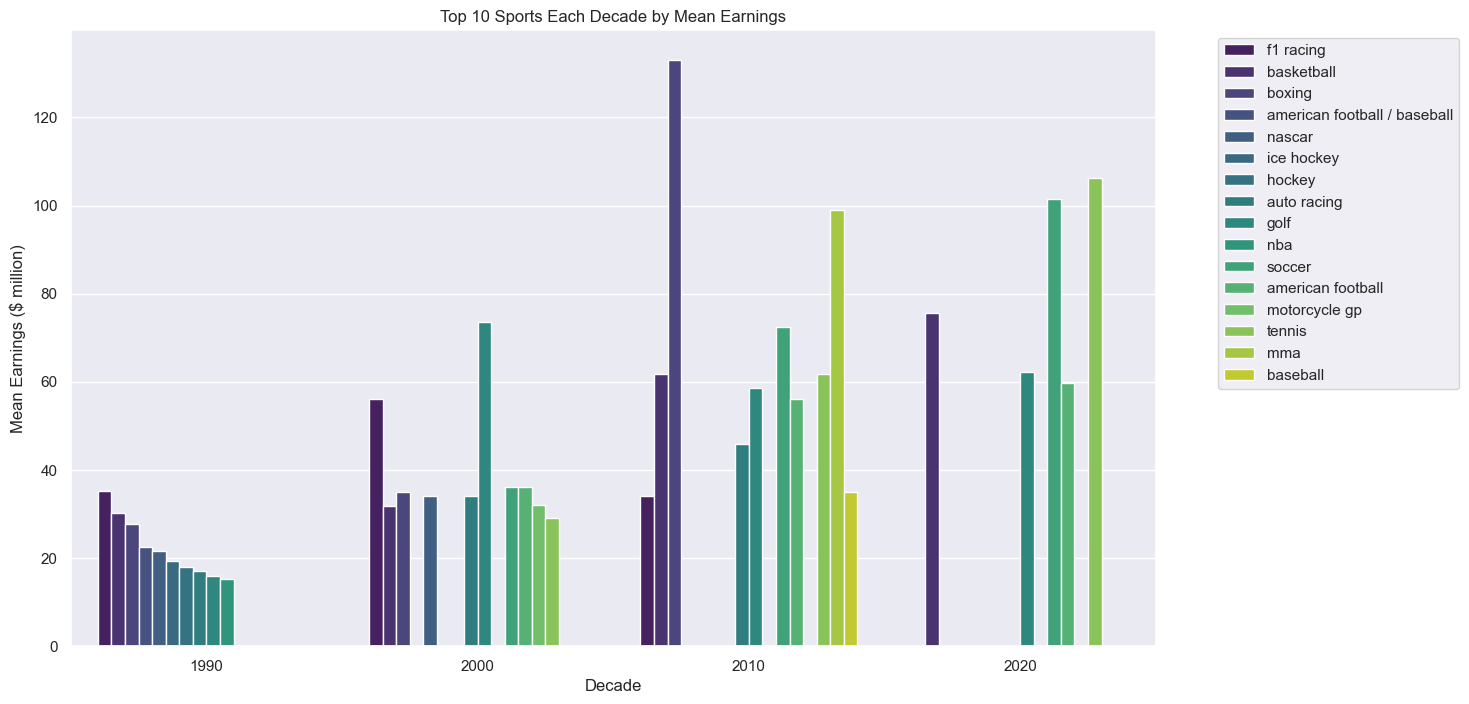

In [236]:
# Extract the decade from the 'Year' column
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and sport, calculating the mean earnings
grouped_data = df.groupby(['Decade', 'Sport']).agg({'earnings ($ million)': 'mean'}).reset_index()

# Get the top 10 sports for each decade
top_10_sports_by_decade = grouped_data.sort_values(by=['Decade', 'earnings ($ million)'], ascending=[True, False]).groupby('Decade').head(10)

# Visualization: Bar plot for each decade
plt.figure(figsize=(14, 8))
sns.barplot(x='Decade', y='earnings ($ million)', hue='Sport', data=top_10_sports_by_decade, palette='viridis')
plt.title('Top 10 Sports Each Decade by Mean Earnings')
plt.xlabel('Decade')
plt.ylabel('Mean Earnings ($ million)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

Over the decades which Nationality was the best in soccer?

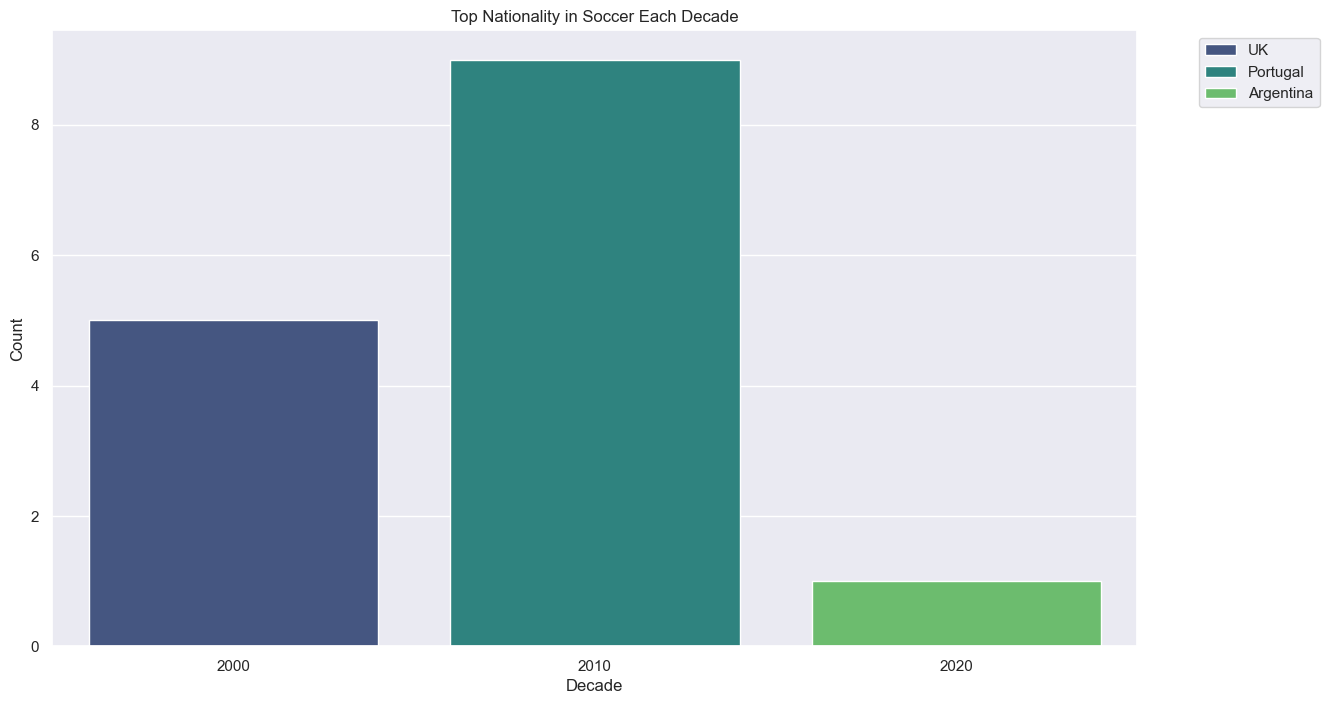

In [246]:
# Extract the decade from the 'Year' column
df['Decade'] = (df['Year'] // 10) * 10

# Filter for boxing only
soccer_df = df[df['Sport'] == 'soccer']

# Group by decade and nationality, calculating the count
grouped_data = soccer_df.groupby(['Decade', 'Nationality']).size().reset_index(name='Count')

# Get the top nationalities for each decade
top_nationalities_by_decade = grouped_data.sort_values(by=['Decade', 'Count'], ascending=[True, False]).groupby('Decade').head(1)

# Visualization: Bar plot for each decade
plt.figure(figsize=(14, 8))
sns.barplot(x='Decade', y='Count', hue='Nationality', data=top_nationalities_by_decade, palette='viridis')
plt.title('Top Nationality in Soccer Each Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

Which are the top most paid players and where do they come from?

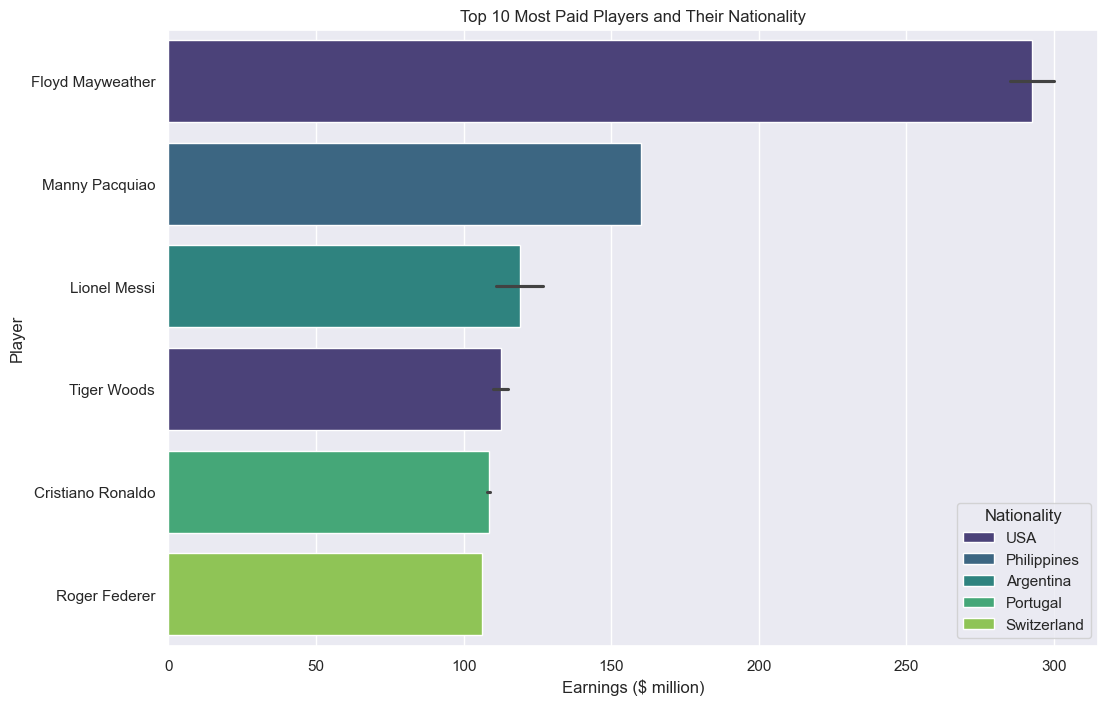

In [247]:
# Sort the dataframe by earnings in descending order and select the top 10
top_10_earnings = df.sort_values(by='earnings ($ million)', ascending=False).head(10)

# Visualization: Bar plot for the top 10 most paid players and their nationality
plt.figure(figsize=(12, 8))
sns.barplot(x='earnings ($ million)', y='Name', hue='Nationality', data=top_10_earnings, palette='viridis')
plt.title('Top 10 Most Paid Players and Their Nationality')
plt.xlabel('Earnings ($ million)')
plt.ylabel('Player')
plt.legend(title='Nationality')
plt.show()

What is the relationship between rank and earnings?

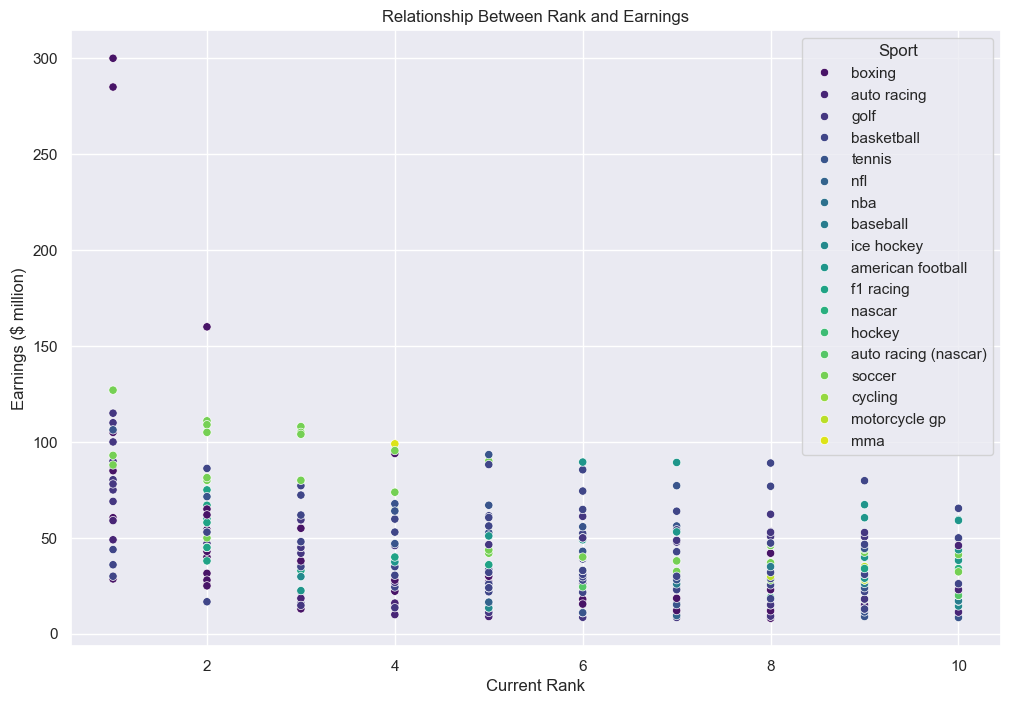

In [217]:
# Visualization: Scatter plot for the relationship between rank and earnings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Current Rank', y='earnings ($ million)', data=df, hue='Sport', palette='viridis')
plt.title('Relationship Between Rank and Earnings')
plt.xlabel('Current Rank')
plt.ylabel('Earnings ($ million)')
plt.legend(title='Sport')
plt.show()

The top 5 ranking sports over the decades

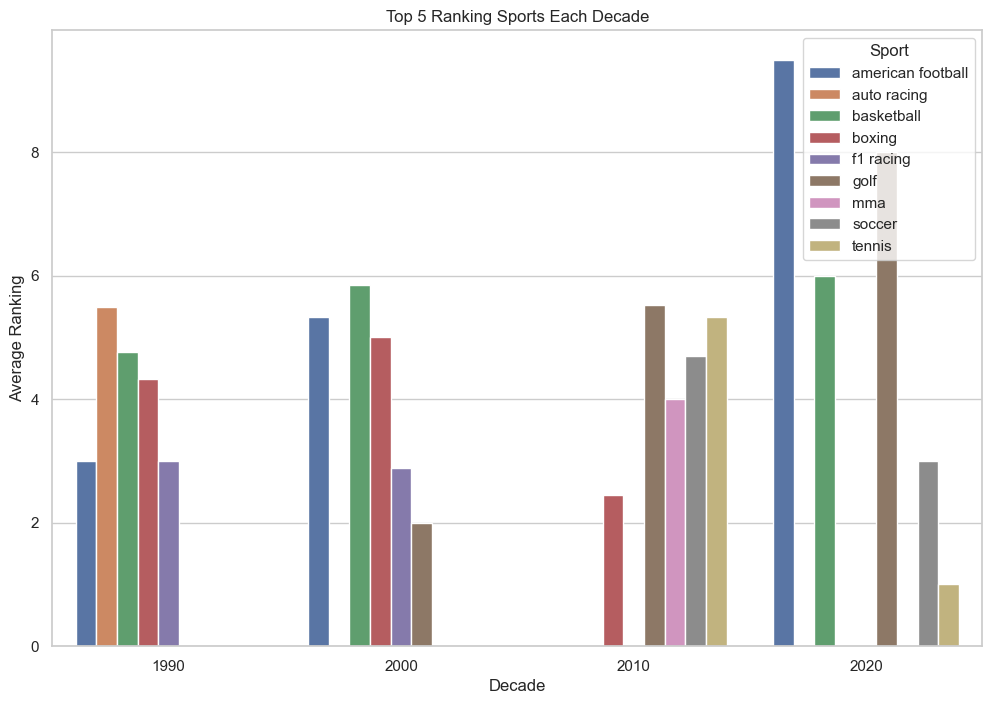

In [218]:
# Assuming your dataframe is named 'df'
df['Decade'] = (df['Year'] // 10) * 10

# Group by Decade and Sport, calculate the average ranking
avg_rankings = df.groupby(['Decade', 'Sport'])['Current Rank'].mean().reset_index()

# Rank the sports within each decade
avg_rankings['Rank'] = avg_rankings.groupby('Decade')['Current Rank'].rank()

# Select the top 5 sports for each decade
top_5_sports = avg_rankings[avg_rankings['Rank'] <= 5]

# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Plot the data
sns.barplot(x='Decade', y='Current Rank', hue='Sport', data=top_5_sports, errorbar=None)

# Add labels and title
plt.title('Top 5 Ranking Sports Each Decade')
plt.xlabel('Decade')
plt.ylabel('Average Ranking')
plt.legend(title='Sport',loc='upper right')
# Display the plot
plt.show()

Selected Athletes earnings to see if their earnings incresed or decreased over the years

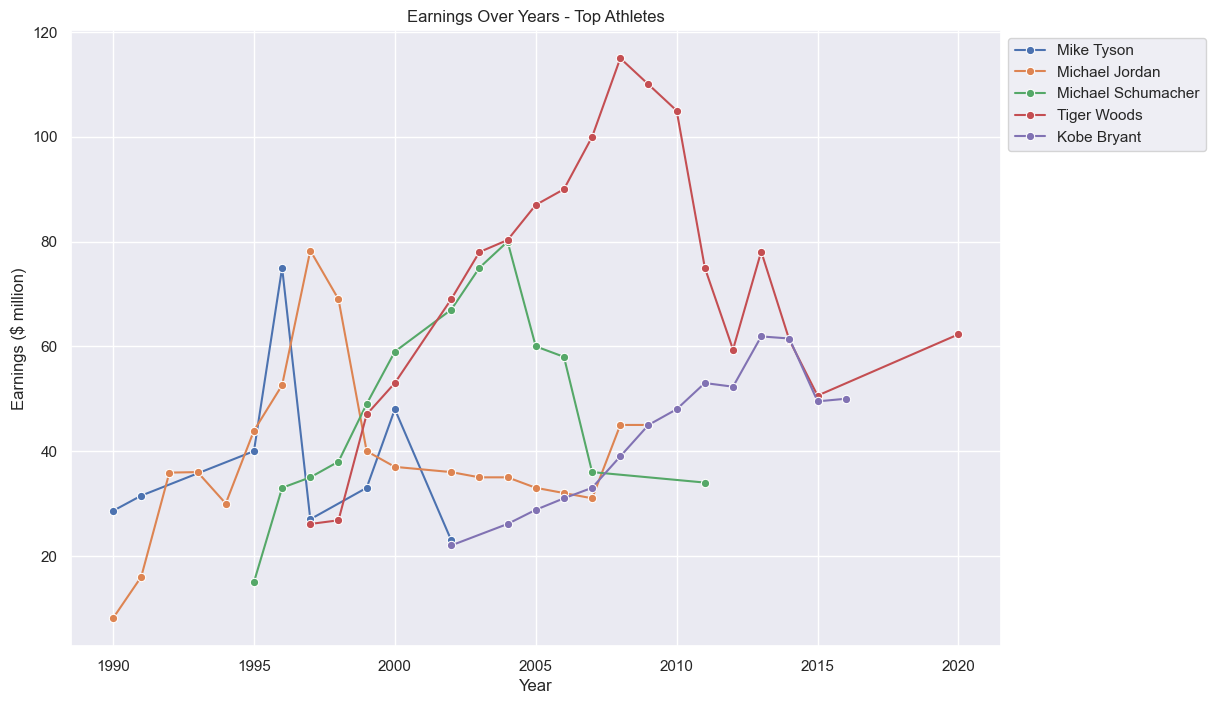

In [219]:
selected_athletes = ['Mike Tyson', 'Michael Jordan', 'Michael Schumacher', 'Tiger Woods', 'Kobe Bryant']
top_athletes_data = df[df['Name'].isin(selected_athletes)]

# Create a line chart using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(x='Year', y='earnings ($ million)', hue='Name', data=top_athletes_data, marker='o')

# Add labels and title
plt.title('Earnings Over Years - Top Athletes')
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

which countries appear the most on the list?

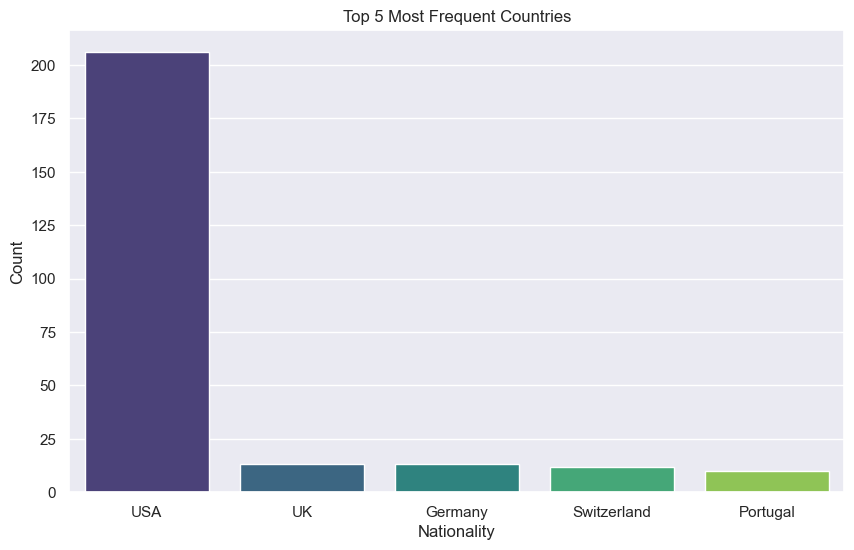

In [220]:
# Extract the top 5 most frequent countries
top_countries = df['Nationality'].value_counts().head(5).index

# Filter the dataframe for the top countries
top_countries_data = df[df['Nationality'].isin(top_countries)]

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# Assign 'Nationality' to hue and set legend=False
sns.countplot(x='Nationality', hue='Nationality', data=top_countries_data, order=top_countries, palette='viridis', legend=False)

# Add labels and title
plt.title('Top 5 Most Frequent Countries')
plt.xlabel('Nationality')
plt.ylabel('Count')

# Display the plot
plt.show()


What are the top 5 most popular sports and how much do they earn each year?

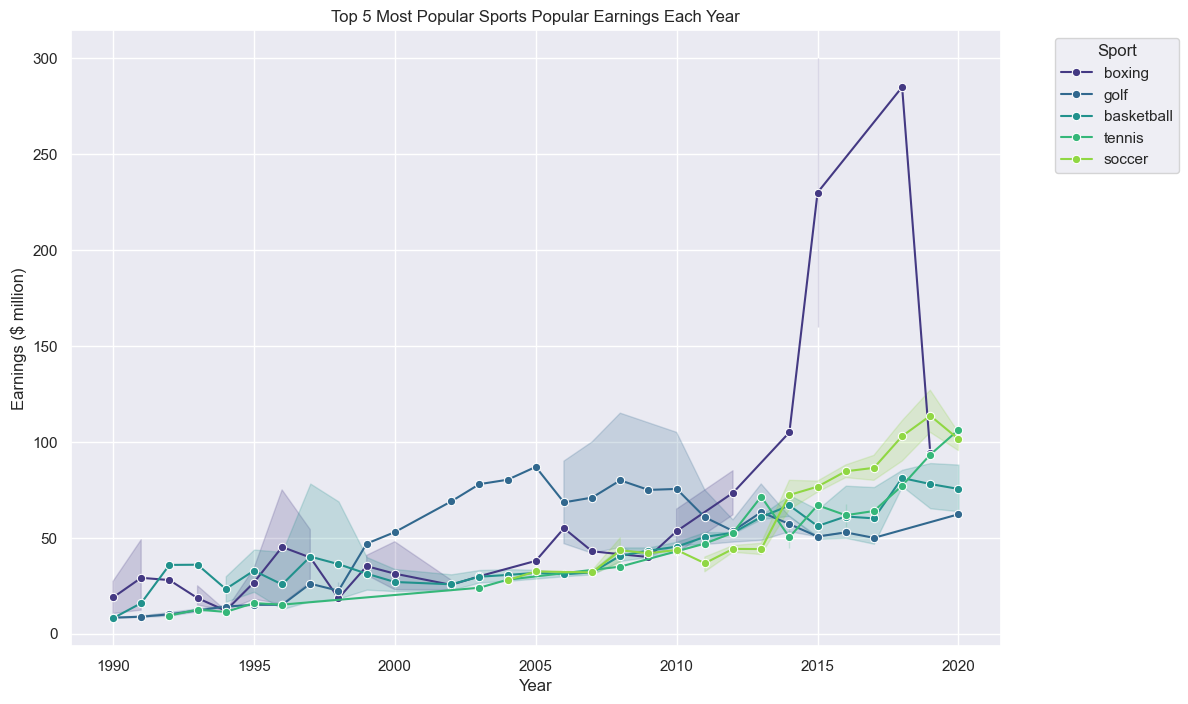

In [221]:
# Extract the top 5 most popular sports
top_sports = df['Sport'].value_counts().head(5).index

# Filter the dataframe for the top sports
top_sports_data = df[df['Sport'].isin(top_sports)]

# Create a line plot using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(x='Year', y='earnings ($ million)', hue='Sport', data=top_sports_data, palette='viridis', marker='o')

# Add labels and title
plt.title('Top 5 Most Popular Sports Popular Earnings Each Year')
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')

# Display the legend
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

what is the relationship between previous rank and current rank do athletes which have been in the list before have a greater chance of appearing again than those who have not?

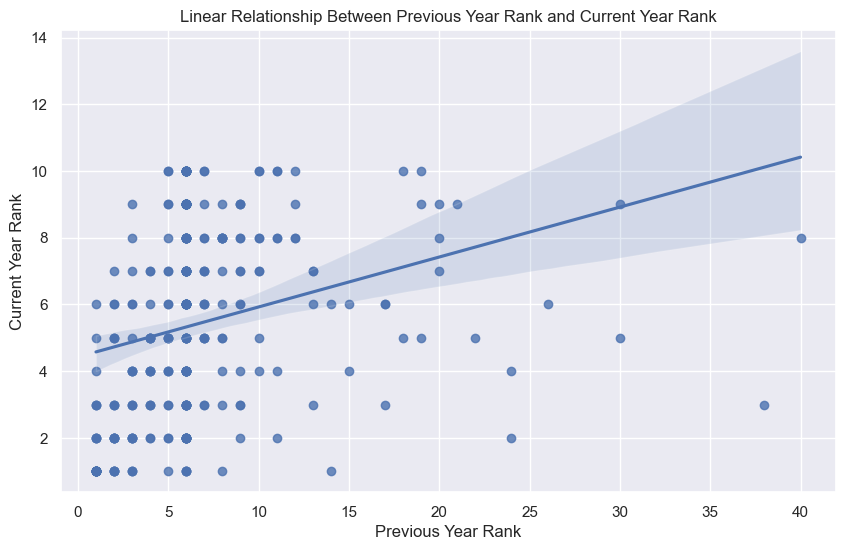

In [245]:
# Visualization: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Previous Year Rank', y='Current Rank', data=df)
plt.title('Linear Relationship Between Previous Year Rank and Current Year Rank')
plt.xlabel('Previous Year Rank')
plt.ylabel('Current Year Rank')
plt.show()

What are the top 5 athletes earnings over the years?

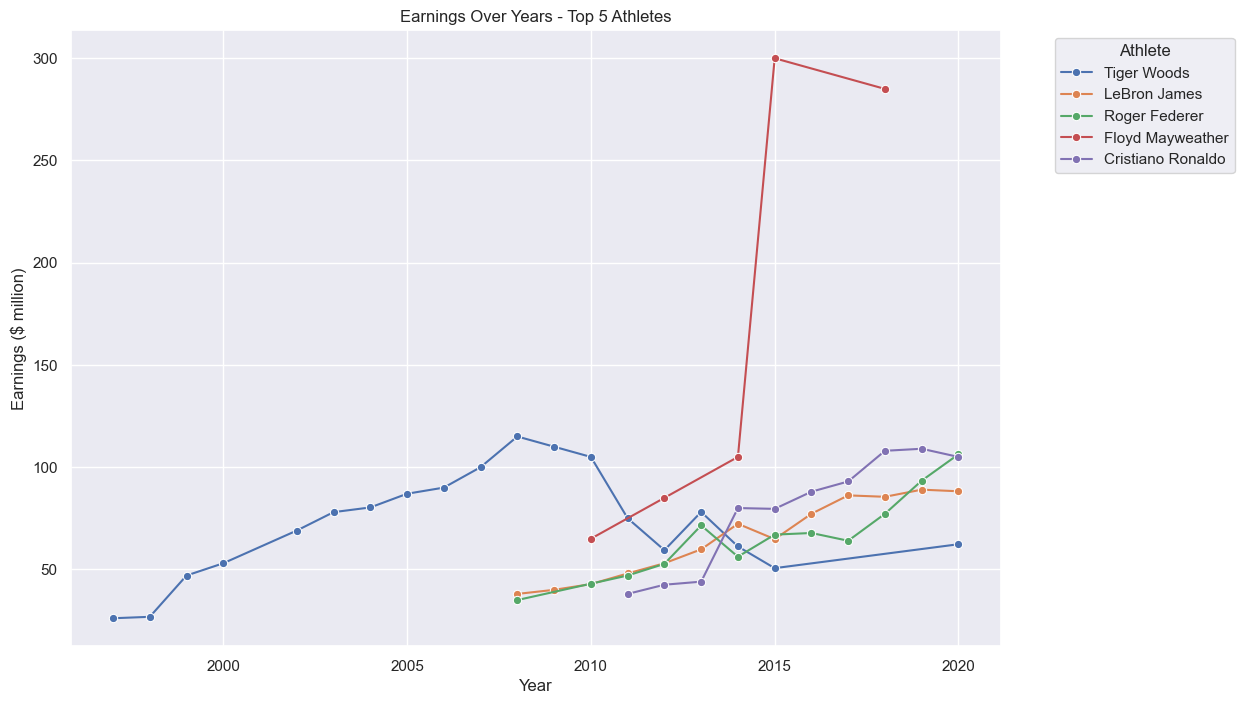

In [131]:
# Identify the top 5 athletes based on total earnings
top_5_athletes = df.groupby('Name')['earnings ($ million)'].sum().nlargest(5).index

# Filter the dataframe for the top 5 athletes
top_5_athletes_data = df[df['Name'].isin(top_5_athletes)]

# Create a line chart using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(x='Year', y='earnings ($ million)', hue='Name', data=top_5_athletes_data, marker='o')

# Add labels and title
plt.title('Earnings Over Years - Top 5 Athletes')
plt.xlabel('Year')
plt.ylabel('Earnings ($ million)')

# Display the legend
plt.legend(title='Athlete', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

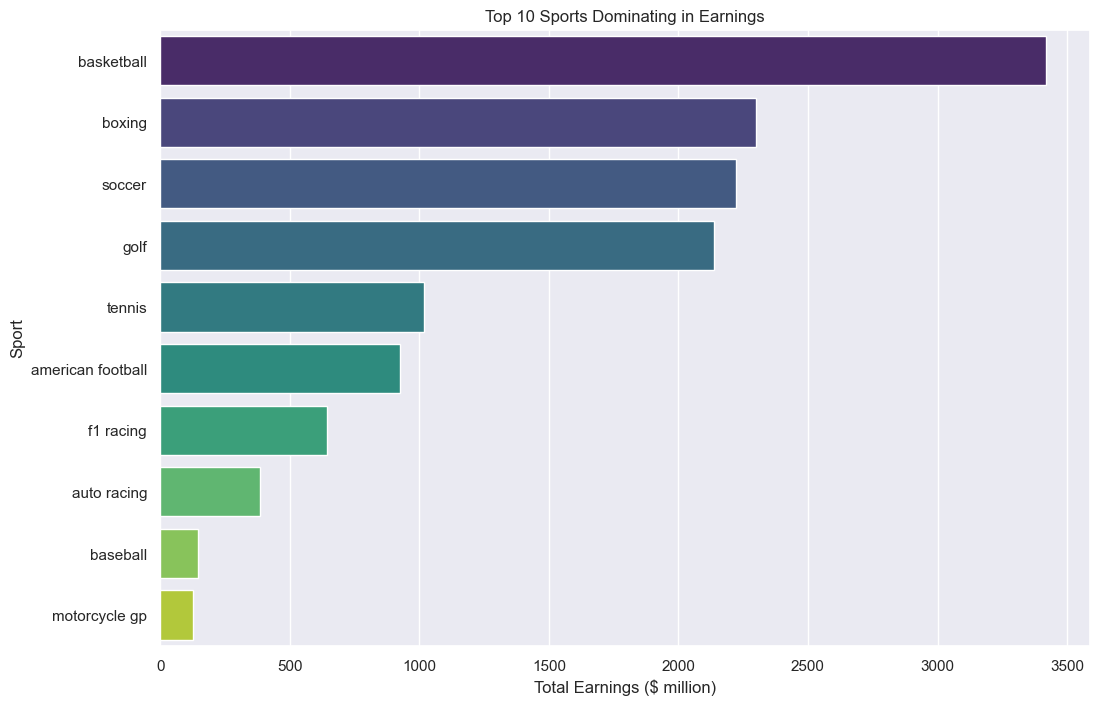

In [200]:
# Group by sport and calculate the total earnings
top_sports_earnings = df.groupby('Sport')['earnings ($ million)'].sum().sort_values(ascending=False).head(10).reset_index()

# Visualization: Bar plot for the top 10 sports that dominate in earnings
plt.figure(figsize=(12, 8))
sns.barplot(x='earnings ($ million)', y='Sport', hue='Sport', data=top_sports_earnings, palette='viridis', legend=False)
plt.title('Top 10 Sports Dominating in Earnings')
plt.xlabel('Total Earnings ($ million)')
plt.ylabel('Sport')
plt.show()